## Assignments for Week-02

In this course, we learnt what's the search problem and what's the machine leanring. In this assignment, we need you do some more practice.

### 1. Re-code the house price machine learning

###### 1. Random Choose Method to get optimal *k* and *b*
###### 2.Supervised Direction to get optimal *k* and *b*
###### 3.Gradient Descent to get optimal *k* and *b*
###### 4. Try different Loss function and learning rate. 

For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

## anwsers:

In [2]:
from sklearn.datasets import load_boston

##### 1.1 Random Choose Method to get optimal k* and *b

In [57]:
%matplotlib inline

In [58]:
import matplotlib.pyplot as plot

In [59]:
data = load_boston()

In [60]:
X, Y = data['data'], data['target']

In [61]:
X_RM = X[:, 5]

In [66]:
def draw_rm_and_price():
    plot.scatter(X_RM, Y)

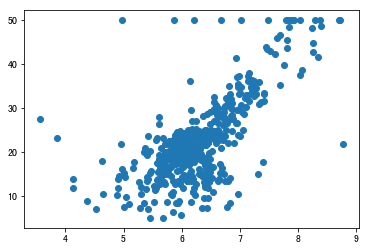

In [67]:
draw_rm_and_price()

In [37]:
def price(x, k, b):
    return k * x + b

In [75]:
import random
k = random.randint(-100, 100)
b = random.randint(-100, 100)

In [76]:
price_by_random_k_and_b = [price(rm, k, b) for rm in X_RM]

In [77]:
%matplotlib inline

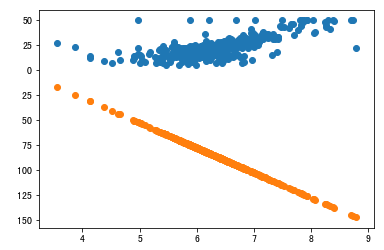

In [78]:
draw_rm_and_price()
plot.scatter(X_RM, price_by_random_k_and_b)

In [98]:
z = zip([1, 2, 3], [4, 5, 6])

In [97]:
sum([(y-y_hat)**2 for y, y_hat in z])/3

9.0

In [99]:
def loss(y, y_hat):
    return sum([(y_i - y_hat_i)**2 for y_i, y_hat_i in zip(list(y), list(y_hat))]) / len(y)

In [100]:
loss([1,2,3], [4,5,6])

9.0

In [127]:
def get_k_and_b_by_random(times):
    cur_loss = float('inf')
    best_k, best_b = None, None
    for i in range(times+1):
        k = random.random() * 200 -100
        b = random.random() * 200 -100
        Y_hat = [price(rm, k, b) for rm in X_RM]
        new_loss = loss(Y, Y_hat)
        if new_loss < cur_loss:
            cur_loss = new_loss
            best_k, best_b = k, b
            print("{} times, best_k is {} and best_b is {} , loss is {}".format(i, best_k, best_b, cur_loss))
    return best_k, best_b
        

In [131]:
k,b = get_k_and_b_by_random(5000)

0 times, best_k is -22.74542582365339 and best_b is 47.098336852164636 , loss is 14557.422100169073
1 times, best_k is -7.865480206248748 and best_b is 6.781080942329098 , loss is 4434.321744186301
6 times, best_k is 9.670785829451802 and best_b is 0.30037300969701164 , loss is 1529.470733305128
13 times, best_k is 5.672068703178908 and best_b is 4.664240614621534 , loss is 365.4655864448333
29 times, best_k is 16.47878051206719 and best_b is -85.07950549005072 , loss is 86.80673125185115
85 times, best_k is 7.184656379751516 and best_b is -26.977164540120796 , loss is 64.39573768987748
546 times, best_k is 15.456974110152316 and best_b is -75.05408342425841 , loss is 63.69614199397614
802 times, best_k is 7.588497336636294 and best_b is -21.84733745576324 , loss is 55.69064053958299
1024 times, best_k is 12.549536438256865 and best_b is -58.37093186583042 , loss is 53.595263567897284
2172 times, best_k is 10.34338409871522 and best_b is -43.95514704706691 , loss is 46.56064680779766


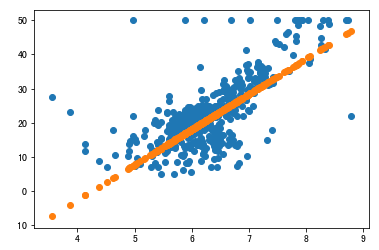

In [132]:
price_by_random_k_and_b = [price(rm, k, b) for rm in X_RM]
draw_rm_and_price()
plot.scatter(X_RM, price_by_random_k_and_b)

##### 1.2 Supervised Direction to get optimal *k* and *b*

In [162]:
def get_k_and_b_by_with_supervised_direction(times):
    cur_loss = float('inf')
    best_k = random.random() * 200 -100
    best_b = random.random() * 200 -100
    directions = [
        (1, 1),
        (1, -1),
        (-1, 1),
        (-1, -1)
    ]
    cur_direction = random.choice(directions)
    scalar = 0.1
    update_times = 0
    for i in range(times+1):
        k = best_k + cur_direction[0] * scalar
        b = best_b + cur_direction[1] * scalar
        Y_hat = [price(rm, k, b) for rm in X_RM]
        new_loss = loss(Y, Y_hat)
        if new_loss < cur_loss:
            cur_loss = new_loss
            best_k, best_b = k, b
            update_times += 1
            if update_times % 10 == 0:
                print("{} times, best_k is {} and best_b is {} , loss is {}".format(i, best_k, best_b, cur_loss))
        else:
            cur_direction = random.choice(directions)
    return best_k, best_b

In [204]:
get_k_and_b_by_with_supervised_direction(2000)

9 times, best_k is -35.88985388004901 and best_b is 10.244480597916185 , loss is 57610.214013132354
19 times, best_k is -32.96547696968531 and best_b is 10.702957318638092 , loss is 48879.063130621245
29 times, best_k is -30.272102698458387 and best_b is 11.125119283439025 , loss is 41472.89879958773
39 times, best_k is -27.791482489421746 and best_b is 11.513835261128822 , loss is 35190.64905464026
49 times, best_k is -25.50680935334609 and best_b is 11.871747395619789 , loss is 29861.755398787187
59 times, best_k is -23.402604007228554 and best_b is 12.20128910867437 , loss is 25341.54226356016
69 times, best_k is -21.464609989128622 and best_b is 12.504701588384698 , loss is 21507.289171933182
79 times, best_k is -19.679697058645363 and best_b is 12.784048975107284 , loss is 18254.898966100674
89 times, best_k is -18.035772228493023 and best_b is 13.041232347750393 , loss is 15496.071644906844
99 times, best_k is -16.5216978243391 and best_b is 13.278002605182895 , loss is 13155.907

889 times, best_k is 1.1167812886966237 and best_b is 15.952212595067044 , loss is 75.20930434294424
899 times, best_k is 1.1190666212801816 and best_b is 15.951324348401178 , loss is 75.20330852900412
909 times, best_k is 1.1211865331634512 and best_b is 15.950410126761488 , loss is 75.19799220000473
919 times, best_k is 1.1231540917663139 and best_b is 15.949471984411906 , loss is 75.19325225249187
929 times, best_k is 1.1249813322181934 and best_b is 15.948511813335067 , loss is 75.1890012293687
939 times, best_k is 1.1266793389061822 and best_b is 15.947531356052098 , loss is 75.18516494549922
949 times, best_k is 1.1282583205810879 and best_b is 15.94653221742966 , loss is 75.18168047363606
959 times, best_k is 1.1297276795303066 and best_b is 15.945515875554273 , loss is 75.17849443599007
969 times, best_k is 1.1310960752862294 and best_b is 15.944483691747614 , loss is 75.17556155506321
979 times, best_k is 1.1323714833018577 and best_b is 15.943436919790601 , loss is 75.1728434

(1.1645389457416244, 15.821180593124458)

##### 1.3.Gradient Descent to get optimal *k* and *b*

In [211]:
def partial_k(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for x_i, y_i, y_hat_i in zip(list(x), list(y), list(y_hat)):
        gradient += (y_i - y_hat_i) * x_i
    
    return -2 / n * gradient


def partial_b(x, y, y_hat):
    n = len(y)

    gradient = 0
    
    for y_i, y_hat_i in zip(list(y), list(y_hat)):
        gradient += (y_i - y_hat_i)
    
    return -2 / n * gradient

In [217]:
def get_k_and_b_by_with_gradient_descent(times):
    cur_loss = float('inf')
    k = random.random() * 200 -100
    b = random.random() * 200 -100
   
    learning_rate = 1e-04
    update_times = 0
    for i in range(times+1):
        Y_hat = [price(rm, k, b) for rm in X_RM]
        new_loss = loss(Y, Y_hat)
        if new_loss < cur_loss:
            cur_loss = new_loss
            update_times += 1
            if update_times % 100 == 0:
                print("{} times, best_k is {} and best_b is {} , loss is {}".format(i, k, b, cur_loss))
                
        k_gradient = partial_k(X_RM, Y, Y_hat)
        b_gradient = partial_b(X_RM, Y, Y_hat)
        k = k + (-1 * k_gradient) * learning_rate
        b = b + (-1 * b_gradient) * learning_rate
        
    return k, b

In [218]:
get_k_and_b_by_with_gradient_descent(10000)

99 times, best_k is 30.96389370152684 and best_b is -88.44732468382617 , loss is 7270.81729570501
199 times, best_k is 23.62331910842274 and best_b is -89.5875436050508 , loss is 1468.348344382396
299 times, best_k is 20.39855009713191 and best_b is -90.0807403306593 , loss is 349.33058348377784
399 times, best_k is 18.981221989520986 and best_b is -90.28980148994569 , loss is 133.51374924993652
499 times, best_k is 18.35762507541778 and best_b is -90.37408738774492 , loss is 91.87871126469176
599 times, best_k is 18.082592529008316 and best_b is -90.40358050513673 , loss is 83.83454156266932
699 times, best_k is 17.960631004558955 and best_b is -90.40901338636573 , loss is 82.26835900876536
799 times, best_k is 17.90589033079224 and best_b is -90.40388211279573 , loss is 81.95145977069956
899 times, best_k is 17.88066972618946 and best_b is -90.3941134376182 , loss is 81.87549126120156
999 times, best_k is 17.868413033561204 and best_b is -90.38231007188375 , loss is 81.84599324932945

8399 times, best_k is 17.7059892383427 and best_b is -89.40091843340252 , loss is 80.50621766613622
8499 times, best_k is 17.703920490042744 and best_b is -89.38775888133416 , loss is 80.48847233437021
8599 times, best_k is 17.701852239160154 and best_b is -89.37460249339641 , loss is 80.47073553508267
8699 times, best_k is 17.699784485575357 and best_b is -89.36144926882854 , loss is 80.45300726417094
8799 times, best_k is 17.69771722916873 and best_b is -89.34829920686984 , loss is 80.43528751753419
8899 times, best_k is 17.695650469820784 and best_b is -89.3351523067599 , loss is 80.41757629107393
8999 times, best_k is 17.69358420741198 and best_b is -89.3220085677385 , loss is 80.3998735806933
9099 times, best_k is 17.691518441822822 and best_b is -89.30886798904551 , loss is 80.38217938229738
9199 times, best_k is 17.689453172933877 and best_b is -89.29573056992112 , loss is 80.36449369179344
9299 times, best_k is 17.68738840062569 and best_b is -89.2825963096057 , loss is 80.3468

(17.672907667768207, -89.19048265903272)

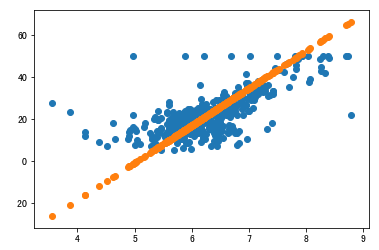

In [216]:
k, b = 17.763502276659363, -89.76676565722991
price_by_random_k_and_b = [price(rm, k, b) for rm in X_RM]
draw_rm_and_price()
plot.scatter(X_RM, price_by_random_k_and_b)

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414412237&di=8377c38d7b50c6f8d45b92ccc78dc1e7&imgtype=0&src=http%3A%2F%2Fmmbiz.qpic.cn%2Fmmbiz_jpg%2FlSyiavfm6wPgQDuDYa42IMgSkLOcPJU91RbkMibGy7VHLrhhNVLibTYk1iaLcmXKTdHc4icTDVia59QFXwqpW8cLflaw%2F640%3Fwx_fmt%3Djpeg)

## 2. Answer following questions:


###### 1. Why do we need machine learning methods instead of creating a complicated formula?


Ans: 要解决的问题越来越复杂，通过写复杂的公式和规则已经无法解决问题，并且设计公式和函数的方式有滞后性，需要人根据出现的问题不断的跟新函数或公式

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans: 依靠随机数，需要通过大量的尝试获得相对优秀的解，需要耗费大量的时间

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans: 第二个方法要比第一个随机的随机方式好，求解的时间会大大减少，因为在求解过程中，会根据loss的是否变小，调整求解的方向。
缺点在于，在选取求解方向的时候，是随机的，无法保证下一次求解的方向时朝着最优解靠近

###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

Ans: 运用导数方式来求解，可以通过导数的值来判断最优解的方向，不需要通过数据求解后判断方向，所以可以更快速的求解

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans: 梯度就是导数的值。下降指的是当导数的值逐渐减，可以不断接近原方程最优的解

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans:　通过导数求解可以定位最优解得到方向，从而可以比其他方法更快速的求得最优解

###### 7. Using the simple words to describe: What's the machine leanring.

Ans:　运用大量数据来构建可以描述实际问题函数

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-July-13

>Submit: Submit the source code and result to github. 



![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414356407&di=b57814aafd215bb8b8d9d8cd37c573d6&imgtype=0&src=http%3A%2F%2Fcli.clewm.net%2Ffile%2F2015%2F03%2F24%2F174ed60082b8422ac0636cfd3efb9e7f.jpg)

#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package **requests**[https://2.python-requests.org/en/master/] page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is to get station information of all the subway lines;

> e.	You may need install @package beautiful soup[https://www.crummy.com/software/BeautifulSoup/bs4/doc/]  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

In [1]:
import sys
!{sys.executable} -m pip install requests

Looking in indexes: https://pypi.douban.com/simple


In [2]:
import requests

In [3]:
baidubaike_baseurl = 'https://baike.baidu.com'
url = baidubaike_baseurl + '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485'
kv = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; WOW64; rv:44.0) Gecko/20100101 Firefox/44.0"}
response = requests.get(url, headers=kv)
response.encoding = 'utf-8'
print(response.text)

<!DOCTYPE html>
<!--STATUS OK-->
<html>



<head>
<meta charset="UTF-8">
<meta http-equiv="X-UA-Compatible" content="IE=Edge" />
<meta name="referrer" content="always" />
<meta name="description" content="北京地铁（Beijing Subway）是服务于中国北京市的城市轨道交通系统，也是国际地铁联盟（CoMET）的14个成员之一，其第一条线路于1971年1月15日正式开通运营，使北京成为中国第一个开通地铁的城市。2017年，北京地铁年乘客量达到45.3亿人次，日均客流为1241.1万人次，单日客运量最高达1327.46万人次。截至2018年12月，北京地铁运营线路共有22条地铁线路，均采用地铁系统，覆盖北京市11个市辖区，运营里程637千米，共设车站391座，开通里程居中国第二位。在建线路15条，共320.8千米。2018年12月30日，北京地铁8号线三期、8号线四期、6号线西延等线路开通试运营。至此，北京地铁新增里程28.6公里，运营总里程达636.8公里。到2020年，北京地铁将形成线网由30条运营，总长1177公里的的轨道交通网络。 北京轨道交通1月20日起试行推出电子定期票，为乘客地...">
<title>北京地铁（北京市城市轨道交通系统）_百度百科</title>
<link rel="shortcut icon" href="/favicon.ico" type="image/x-icon" />
<link rel="icon" sizes="any" mask href="//www.baidu.com/img/baidu.svg">

<meta name="keywords" content="北京地铁 北京地铁概况 Beijing Subway 北京轨道交通 北京地铁发展历程 北京地铁运营情况 北京地铁设备设施 北京地铁乘坐导引 北京地铁文化特色 北京地铁建设规划 北京地铁价值意义">
<meta name="image" content="https://bkssl.bdimg.com/cms/static/baike.png">
<scr

In [4]:
import re

In [5]:
m = re.compile(r'<a target=_blank href="(.*?)".*?>(.*?线)</a>')

In [6]:
metro_lines =m.findall(response.text)
metro_lines

[('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF', '北京地铁1号线'),
 ('/item/%E5%A4%8D%E5%85%AB%E7%BA%BF', '复八线'),
 ('/item/%E5%A4%8D%E5%85%AB%E7%BA%BF', '复八线'),
 ('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF', '北京地铁1号线'),
 ('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%BF',
  '北京地铁13号线'),
 ('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%BF',
  '北京地铁13号线'),
 ('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E5%85%AB%E9%80%9A%E7%BA%BF',
  '北京地铁八通线'),
 ('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%815%E5%8F%B7%E7%BA%BF', '北京地铁5号线'),
 ('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%818%E5%8F%B7%E7%BA%BF', '北京地铁8号线'),
 ('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8110%E5%8F%B7%E7%BA%BF',
  '北京地铁10号线'),
 ('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E6%9C%BA%E5%9C%BA%E7%BA%BF',
  '北京地铁机场线'),
 ('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%814%E5%8F%B7%E7%BA%BF', '北京地铁4号线'),
 ('/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8115%E5%8F%B7%E7%BA%BF',
  '北京地铁15号线'),
 

In [7]:
clean_lines = {}
for line_url, line_name in metro_lines:
    clean_lines[line_name] = line_url

In [8]:
clean_lines

{'北京地铁1号线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%811%E5%8F%B7%E7%BA%BF',
 '复八线': '/item/%E5%A4%8D%E5%85%AB%E7%BA%BF',
 '北京地铁13号线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8113%E5%8F%B7%E7%BA%BF',
 '北京地铁八通线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E5%85%AB%E9%80%9A%E7%BA%BF',
 '北京地铁5号线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%815%E5%8F%B7%E7%BA%BF',
 '北京地铁8号线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%818%E5%8F%B7%E7%BA%BF',
 '北京地铁10号线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8110%E5%8F%B7%E7%BA%BF',
 '北京地铁机场线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E6%9C%BA%E5%9C%BA%E7%BA%BF',
 '北京地铁4号线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%814%E5%8F%B7%E7%BA%BF',
 '北京地铁15号线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%8115%E5%8F%B7%E7%BA%BF',
 '北京地铁昌平线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E6%98%8C%E5%B9%B3%E7%BA%BF',
 '北京地铁大兴线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E5%A4%A7%E5%85%B4%E7%BA%BF',
 '北京地铁房山线': '/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81%E6%88%BF%E5%B1

In [9]:
import sys
!{sys.executable} -m pip install beautifulsoup4

Looking in indexes: https://pypi.douban.com/simple


In [10]:
import os
beijing_subwayline_details_folder = 'subline_detail_pages'
if not os.path.exists(beijing_subwayline_details_folder):
    os.mkdir(beijing_subwayline_details_folder)
for line_name, line_url in clean_lines.items():
    response = requests.get(baidubaike_baseurl+line_url, headers = kv)
    response.encoding = 'utf-8'
    with open(beijing_subwayline_details_folder+'/'+line_name, 'w') as f:
        f.write(response.text)

##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

In [96]:
from bs4 import BeautifulSoup as bs
fn = beijing_subwayline_details_folder + '/北京地铁13号线'
f = open(fn,'r')
soup = bs(f, 'html.parser')
stations_table = soup.find('caption', string=re.compile(r'.*车站列表$')).find_parent('table')
stations_table.find_all('a', string = re.compile(r'.*站$'))

AttributeError: 'NoneType' object has no attribute 'find_parent'

In [97]:
line_stations = {}
for line in clean_lines:
    subway_detail_file = beijing_subwayline_details_folder +'/' + line
    with open(subway_detail_file) as f:
        soup = bs(f, 'html.parser')
        caption = soup.find('caption', string=re.compile(r'.*车站列表$'))
        if caption:
            stations_table = caption.find_parent('table')
        else:
            stations_table = soup.find(attrs={'data-sort':'sortDisabled'})
        stations_link = stations_table.find_all('a', string = re.compile(r'.*站$'))
        stations = []
        for sl in stations_link:
            station = sl.string.strip()
            stations.append(station)
            line_stations[line] = stations

In [98]:
line_stations

{'北京地铁1号线': ['黑石头站',
  '高井站',
  '福寿岭站',
  '苹果园站',
  '古城站',
  '衙门口站',
  '八角游乐园站',
  '八宝山站',
  '玉泉路站',
  '五棵松站',
  '万寿路站',
  '公主坟站',
  '军事博物馆站',
  '木樨地站',
  '南礼士路站',
  '复兴门站',
  '西单站',
  '天安门西站',
  '天安门东站',
  '王府井站',
  '东单站',
  '建国门站',
  '永安里站',
  '国贸站',
  '大望路站',
  '四惠站',
  '四惠东站',
  '高碑店站',
  '传媒大学站',
  '双桥站',
  '管庄站',
  '八里桥站',
  '通州北苑站',
  '果园站',
  '九棵树站',
  '梨园站',
  '临河里站',
  '土桥站',
  '花庄站'],
 '复八线': ['黑石头站',
  '高井站',
  '福寿岭站',
  '苹果园站',
  '古城站',
  '衙门口站',
  '八角游乐园站',
  '八宝山站',
  '玉泉路站',
  '五棵松站',
  '万寿路站',
  '公主坟站',
  '军事博物馆站',
  '木樨地站',
  '南礼士路站',
  '复兴门站',
  '西单站',
  '天安门西站',
  '天安门东站',
  '王府井站',
  '东单站',
  '建国门站',
  '永安里站',
  '国贸站',
  '大望路站',
  '四惠站',
  '四惠东站',
  '高碑店站',
  '传媒大学站',
  '双桥站',
  '管庄站',
  '八里桥站',
  '通州北苑站',
  '果园站',
  '九棵树站',
  '梨园站',
  '临河里站',
  '土桥站',
  '花庄站'],
 '北京地铁13号线': ['车公庄站',
  '西直门站',
  '北京北站',
  '大钟寺站',
  '知春路站',
  '五道口站',
  '上地站',
  '西二旗站',
  '龙泽站',
  '回龙观站',
  '霍营站',
  '立水桥站',
  '北苑站',
  '望京西站',
  '芍药居站',
  '光熙门站',
  '柳芳站',
  '东直门站'],
 '北京地铁八通线': ['四惠站'

In [99]:
station_connections = []

##### 3. Build the search agent

> Build the search agent based on the graph we build.

for example, when you run: 

```python
>>> search('奥体中心', '天安门') 
```
you need get the result: 

奥体中心-> A -> B -> C -> ... -> 天安门



## （Optional）Create different policies for transfer system.


以下部门为可选部分，请酌情完成。 并不要求全部同学完成。

As much as you can to use the already implemented search agent. You just need to define the **is_goal()**, **get_successor()**, **strategy()** three functions. 

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因


恭喜，完成本次课程，你对常用的人工智能方法以及有一定的了解了。基于规则的，基于概率模型的，基于搜索的，基于机器学习的。 可以说，我们现在通常见到的方法都能够归属到这几类方法中。 这就是**人工智能**，并没有很难是吧？ 继续加油！

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562415163815&di=4b29a2a863a8285212033760f288ed7a&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20180710%2F8704194a1d7f46a383ddc29d40c9bca5.jpeg)